In [22]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from PIL import Image
import seaborn as sns
import torch
import pandas_profiling

In [23]:
data_path = '/opt/ml/input/data'
train = pd.read_csv(os.path.join(data_path,'train/train.csv'))
test = pd.read_csv(os.path.join(data_path,'eval/info.csv'))
train_image = os.path.join(data_path, 'train/images/')

In [24]:
train

id  gender   race  age                    path
0     000001  female  Asian   45  000001_female_Asian_45
1     000002  female  Asian   52  000002_female_Asian_52
2     000004    male  Asian   54    000004_male_Asian_54
3     000005  female  Asian   58  000005_female_Asian_58
4     000006  female  Asian   59  000006_female_Asian_59
...      ...     ...    ...  ...                     ...
2695  006954    male  Asian   19    006954_male_Asian_19
2696  006955    male  Asian   19    006955_male_Asian_19
2697  006956    male  Asian   19    006956_male_Asian_19
2698  006957    male  Asian   20    006957_male_Asian_20
2699  006959    male  Asian   19    006959_male_Asian_19

[2700 rows x 5 columns]

In [25]:
test

ImageID  ans
0      cbc5c6e168e63498590db46022617123f1fe1268.jpg    0
1      0e72482bf56b3581c081f7da2a6180b8792c7089.jpg    0
2      b549040c49190cedc41327748aeb197c1670f14d.jpg    0
3      4f9cb2a045c6d5b9e50ad3459ea7b791eb6e18bc.jpg    0
4      248428d9a4a5b6229a7081c32851b90cb8d38d0c.jpg    0
...                                             ...  ...
12595  d71d4570505d6af8f777690e63edfa8d85ea4476.jpg    0
12596  6cf1300e8e218716728d5820c0bab553306c2cfd.jpg    0
12597  8140edbba31c3a824e817e6d5fb95343199e2387.jpg    0
12598  030d439efe6fb5a7bafda45a393fc19f2bf57f54.jpg    0
12599  f1e0b9594ae9f72571f0a9dc67406ad41f2edab0.jpg    0

[12600 rows x 2 columns]

In [26]:
image_folder = train['path']
image_path = '/opt/ml/input/data/train/images'
e = os.path.join(image_path, image_folder[0])
image_list = [file for file in os.listdir(e) if file[0]!='.']
image_list

['mask5.jpg',
 'normal.jpg',
 'mask4.jpg',
 'mask3.jpg',
 'mask2.jpg',
 'incorrect_mask.jpg',
 'mask1.jpg']

In [27]:
image_folder = train['path']
image_path = '/opt/ml/input/data/train/images'
print(train[train['path']=='006056_female_Asian_19'].index)
e = os.path.join(image_path, image_folder[2256])
image_list = [file for file in os.listdir(e) if file[0]!='.']
image_list

Int64Index([2256], dtype='int64')


['mask3.png',
 'mask2.png',
 'incorrect_mask.png',
 'mask5.png',
 'mask1.png',
 'mask4.png',
 'normal.png']

In [28]:
pr = train.profile_report()

1번째 - red 평균:167.00, green 평균:153.20, blue 평균:167.00
2번째 - red 평균:151.99, green 평균:139.80, blue 평균:151.99
3번째 - red 평균:166.21, green 평균:151.68, blue 평균:166.21
4번째 - red 평균:169.86, green 평균:156.42, blue 평균:169.86
5번째 - red 평균:158.92, green 평균:147.55, blue 평균:158.92
6번째 - red 평균:162.10, green 평균:147.28, blue 평균:162.10
7번째 - red 평균:166.11, green 평균:166.79, blue 평균:166.11


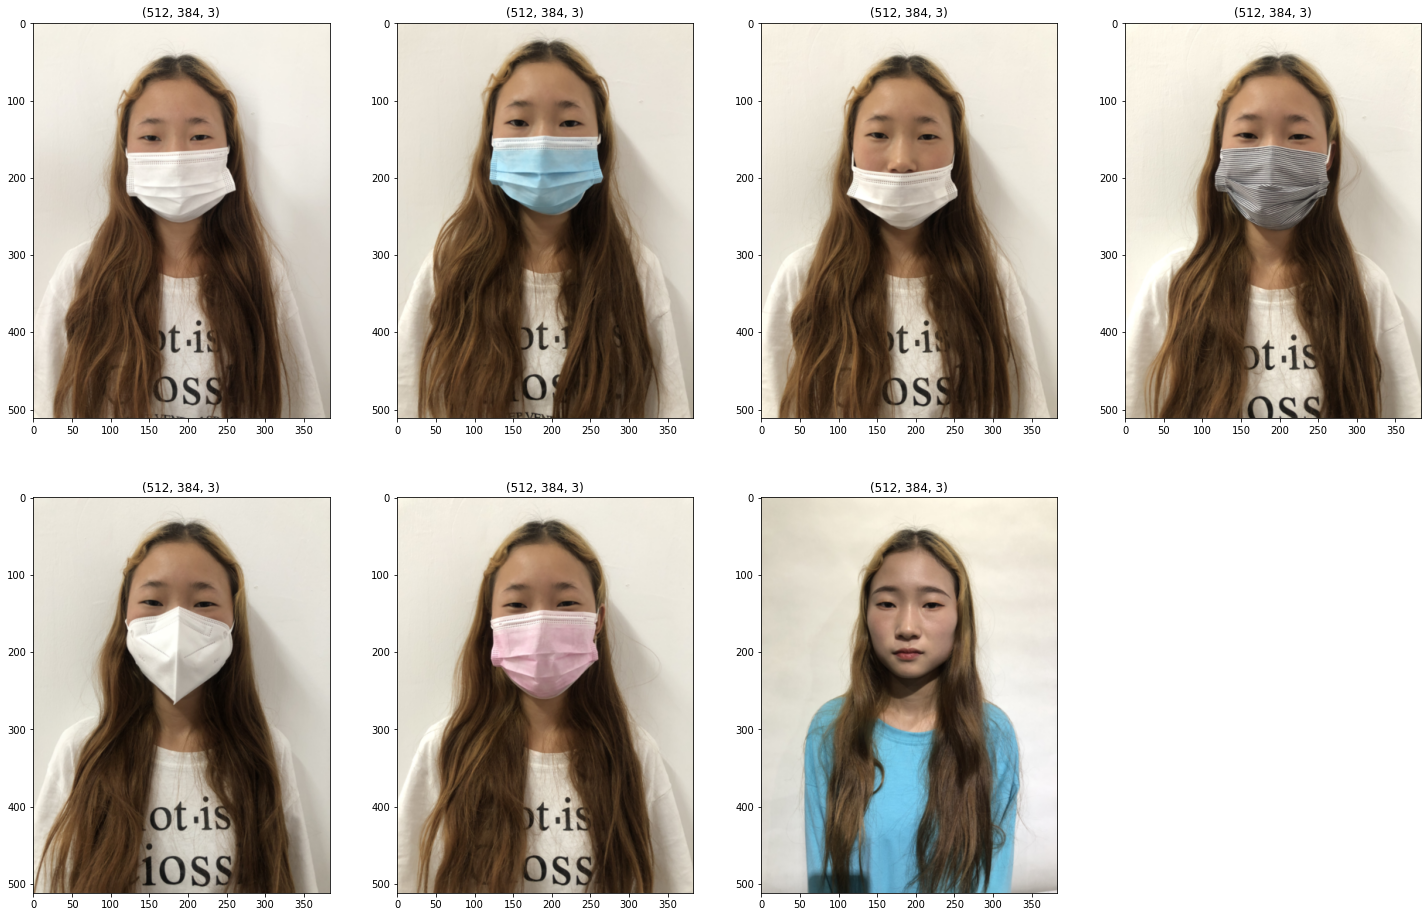

In [29]:
plt.figure(figsize=(25,16))
for idx, p in enumerate(image_list):
    plt.subplot(2,4,idx+1)
    path = os.path.join(e, p)
    image_pil = Image.open(path)
    image = np.array(image_pil)
    print(f'{idx+1}번째 - red 평균:{np.mean(image[:,:,0]):.2f}, green 평균:{np.mean(image[:,:,1]):.2f}, blue 평균:{np.mean(image[:,:,0]):.2f}')
    plt.imshow(image)
    plt.title(image.shape)
plt.show()


In [30]:
def age(x):
    if int(x) < 30:
        return 0
    elif int(x) < 60:
        return 1
    else:
        return 2

In [31]:
# 나이, 성별 숫자로 바꾸기
train['age2'] = train['age'].apply(age)
train['gender2'] = train['gender'].map({'male':0,'female':1})
train.sample(30)

id  gender   race  age                    path  age2  gender2
1376  003406    male  Asian   55    003406_male_Asian_55     1        0
594   001249  female  Asian   24  001249_female_Asian_24     0        1
319   000743  female  Asian   51  000743_female_Asian_51     1        1
2073  005234    male  Asian   22    005234_male_Asian_22     0        0
90    000263  female  Asian   48  000263_female_Asian_48     1        1
706   001424    male  Asian   55    001424_male_Asian_55     1        0
2629  006688    male  Asian   19    006688_male_Asian_19     0        0
125   000313  female  Asian   54  000313_female_Asian_54     1        1
1907  004427  female  Asian   29  004427_female_Asian_29     0        1
200   000593  female  Asian   58  000593_female_Asian_58     1        1
2096  005263    male  Asian   20    005263_male_Asian_20     0        0
1154  003104  female  Asian   19  003104_female_Asian_19     0        1
1870  004367    male  Asian   52    004367_male_Asian_52     1        0
1951  004482    male  Asian   53    004482_male_Asian_53     1        0
1531  003642    male  Asian   59    003642_male_Asian_59     1        0
2126  005404  female  Asian   25  005404_female_Asian_25     0        1
2413  006375    male  Asian   19    006375_male_Asian_19     0        0
219   000616  female  Asian   57  000616_female_Asian_57     1        1
749   001487  female  Asian   60  001487_female_Asian_60     2        1
2527  006520  female  Asian   19  006520_female_Asian_19     0        1
2411  006372    male  Asian   19    006372_male_Asian_19     0        0
1040  001894  female  Asian   54  001894_female_Asian_54     1        1
382   001005    male  Asian   24    001005_male_Asian_24     0        0
314   000738  female  Asian   53  000738_female_Asian_53     1        1
237   000639  female  Asian   54  000639_female_Asian_54     1        1
1143  003092  female  Asian   20  003092_female_Asian_20     0        1
1127  003068  female  Asian   20  003068_female_Asian_20     0        1
1718  003981    male  Asian   60    003981_male_Asian_60     2        0
2615  006670    male  Asian   19    006670_male_Asian_19     0        0
590   001244    male  Asian   23    001244_male_Asian_23     0        0

In [32]:

def mask_classification(path):

    if path.startswith('mask'):return 0
    elif path.startswith('incorrect'):return 1
    else:return 2

def data_classification(mask,gender,age):
    if mask == 0 and gender == 0 and age == 0:
        return 0
    elif mask == 0 and gender == 0 and age == 1:
        return 1
    elif mask == 0 and gender == 0 and age == 2:
        return 2
    elif mask == 0 and gender == 1 and age == 0:
        return 3
    elif mask == 0 and gender == 1 and age == 1:
        return 4
    elif mask == 0 and gender == 1 and age == 2:
        return 5
    elif mask == 1 and gender == 0 and age == 0:
        return 6
    elif mask == 1 and gender == 0 and age == 1:
        return 7
    elif mask == 1 and gender == 0 and age == 2:
        return 8
    elif mask == 1 and gender == 1 and age == 0:
        return 9
    elif mask == 1 and gender == 1 and age == 1:
        return 10
    elif mask == 1 and gender == 1 and age == 2:
        return 11
    elif mask == 2 and gender == 0 and age == 0:
        return 12
    elif mask == 2 and gender == 0 and age == 1:
        return 13
    elif mask == 2 and gender == 0 and age == 2:
        return 14
    elif mask == 2 and gender == 1 and age == 0:
        return 15
    elif mask == 2 and gender == 1 and age == 1:
        return 16
    elif mask == 2 and gender == 1 and age == 2:
        return 17

In [33]:
image_path = '/opt/ml/input/data/train/images'
df2 = pd.DataFrame(columns=['mask','gender','age','image_info','label','absolute_path'])
tot_idx = 0
for idx in range(len(train)):
    absolute_image_folder = image_path + '/' + train['path'][idx]
    image_list = [file for file in os.listdir(absolute_image_folder) if file[0]!='.']
    for image_idx, img_path in enumerate(image_list):
        df2.loc[tot_idx] = train.loc[idx]['age2']
        df2.loc[tot_idx]['gender'] = train.loc[idx]['gender2']
        df2.loc[tot_idx]['mask'] = mask_classification(img_path)
        df2.loc[tot_idx]['image_info'] = train['path'][idx]+'/'+img_path
        label = data_classification(df2.loc[tot_idx]['mask'], df2.loc[tot_idx]['gender'], df2.loc[tot_idx]['age'])
        df2.loc[tot_idx]['label'] = label
        df2.loc[tot_idx]['absolute_path'] = absolute_image_folder + '/' + img_path
        
        tot_idx+=1
        

In [34]:
df2.sample(30)

mask gender age                                 image_info label  \
17712    0      0   0            006526_male_Asian_19/mask3.jpeg     0   
6224     2      0   0            001641_male_Asian_18/normal.jpg    12   
2087     2      1   1          000720_female_Asian_56/normal.jpg    16   
12551    0      0   2             004249_male_Asian_60/mask5.jpg     2   
7446     1      1   1  001984_female_Asian_33/incorrect_mask.jpg    10   
6795     1      0   1    001762_male_Asian_40/incorrect_mask.jpg     7   
15896    0      0   0             006080_male_Asian_19/mask1.jpg     0   
18401    1      0   0    006687_male_Asian_19/incorrect_mask.jpg     6   
2785     0      0   0             001022_male_Asian_21/mask1.jpg     0   
9684     0      0   1             003415_male_Asian_50/mask3.jpg     1   
8932     0      1   0           003288_female_Asian_20/mask5.jpg     3   
3608     0      0   0             001145_male_Asian_20/mask3.jpg     0   
13748    0      1   0           005005_female_Asian_28/mask5.jpg     3   
2878     2      1   0          001033_female_Asian_19/normal.jpg    15   
18859    2      0   0            006952_male_Asian_19/normal.jpg    12   
3223     0      1   1           001083_female_Asian_34/mask3.jpg     4   
7551     1      1   0  003009_female_Asian_20/incorrect_mask.jpg     9   
17211    1      1   0  006429_female_Asian_18/incorrect_mask.jpg     9   
1291     0      0   1             000566_male_Asian_58/mask3.jpg     1   
16970    0      0   0             006389_male_Asian_19/mask4.jpg     0   
5436     0      1   0           001512_female_Asian_18/mask2.jpg     3   
12380    0      1   1           004214_female_Asian_58/mask2.jpg     4   
11753    0      0   1             003860_male_Asian_54/mask5.jpg     1   
6040     0      1   0           001610_female_Asian_20/mask1.jpg     3   
2536     0      0   1             000814_male_Asian_56/mask4.jpg     1   
17670    0      0   0             006514_male_Asian_20/mask4.jpg     0   
16014    1      0   0    006101_male_Asian_19/incorrect_mask.jpg     6   
8066     0      1   0           003102_female_Asian_20/mask4.jpg     3   
14838    1      0   0    005288_male_Asian_22/incorrect_mask.jpg     6   
4887     2      0   1            001412_male_Asian_50/normal.jpg    13   

                                           absolute_path  
17712  /opt/ml/input/data/train/images/006526_male_As...  
6224   /opt/ml/input/data/train/images/001641_male_As...  
2087   /opt/ml/input/data/train/images/000720_female_...  
12551  /opt/ml/input/data/train/images/004249_male_As...  
7446   /opt/ml/input/data/train/images/001984_female_...  
6795   /opt/ml/input/data/train/images/001762_male_As...  
15896  /opt/ml/input/data/train/images/006080_male_As...  
18401  /opt/ml/input/data/train/images/006687_male_As...  
2785   /opt/ml/input/data/train/images/001022_male_As...  
9684   /opt/ml/input/data/train/images/003415_male_As...  
8932   /opt/ml/input/data/train/images/003288_female_...  
3608   /opt/ml/input/data/train/images/001145_male_As...  
13748  /opt/ml/input/data/train/images/005005_female_...  
2878   /opt/ml/input/data/train/images/001033_female_...  
18859  /opt/ml/input/data/train/images/006952_male_As...  
3223   /opt/ml/input/data/train/images/001083_female_...  
7551   /opt/ml/input/data/train/images/003009_female_...  
17211  /opt/ml/input/data/train/images/006429_female_...  
1291   /opt/ml/input/data/train/images/000566_male_As...  
16970  /opt/ml/input/data/train/images/006389_male_As...  
5436   /opt/ml/input/data/train/images/001512_female_...  
12380  /opt/ml/input/data/train/images/004214_female_...  
11753  /opt/ml/input/data/train/images/003860_male_As...  
6040   /opt/ml/input/data/train/images/001610_female_...  
2536   /opt/ml/input/data/train/images/000814_male_As...  
17670  /opt/ml/input/data/train/images/006514_male_As...  
16014  /opt/ml/input/data/train/images/006101_male_As...  
8066   /opt/ml/input/data/train/images/003102_female_...  


In [35]:
# image, label -> train_data에 합치기
train_data = []

for idx in range(len(df2)):
    absolute_image_path = df2.loc[idx]['absolute_path']
    label = df2.loc[idx]['label']
    image_pil = Image.open(absolute_image_path)
    image = np.array(image_pil)
    train_data.append([image,label])
 

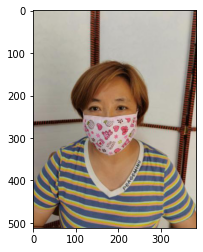

In [36]:
train_data = np.array(train_data)
plt.imshow(np.array(train_data[0][0]))
plt.show()

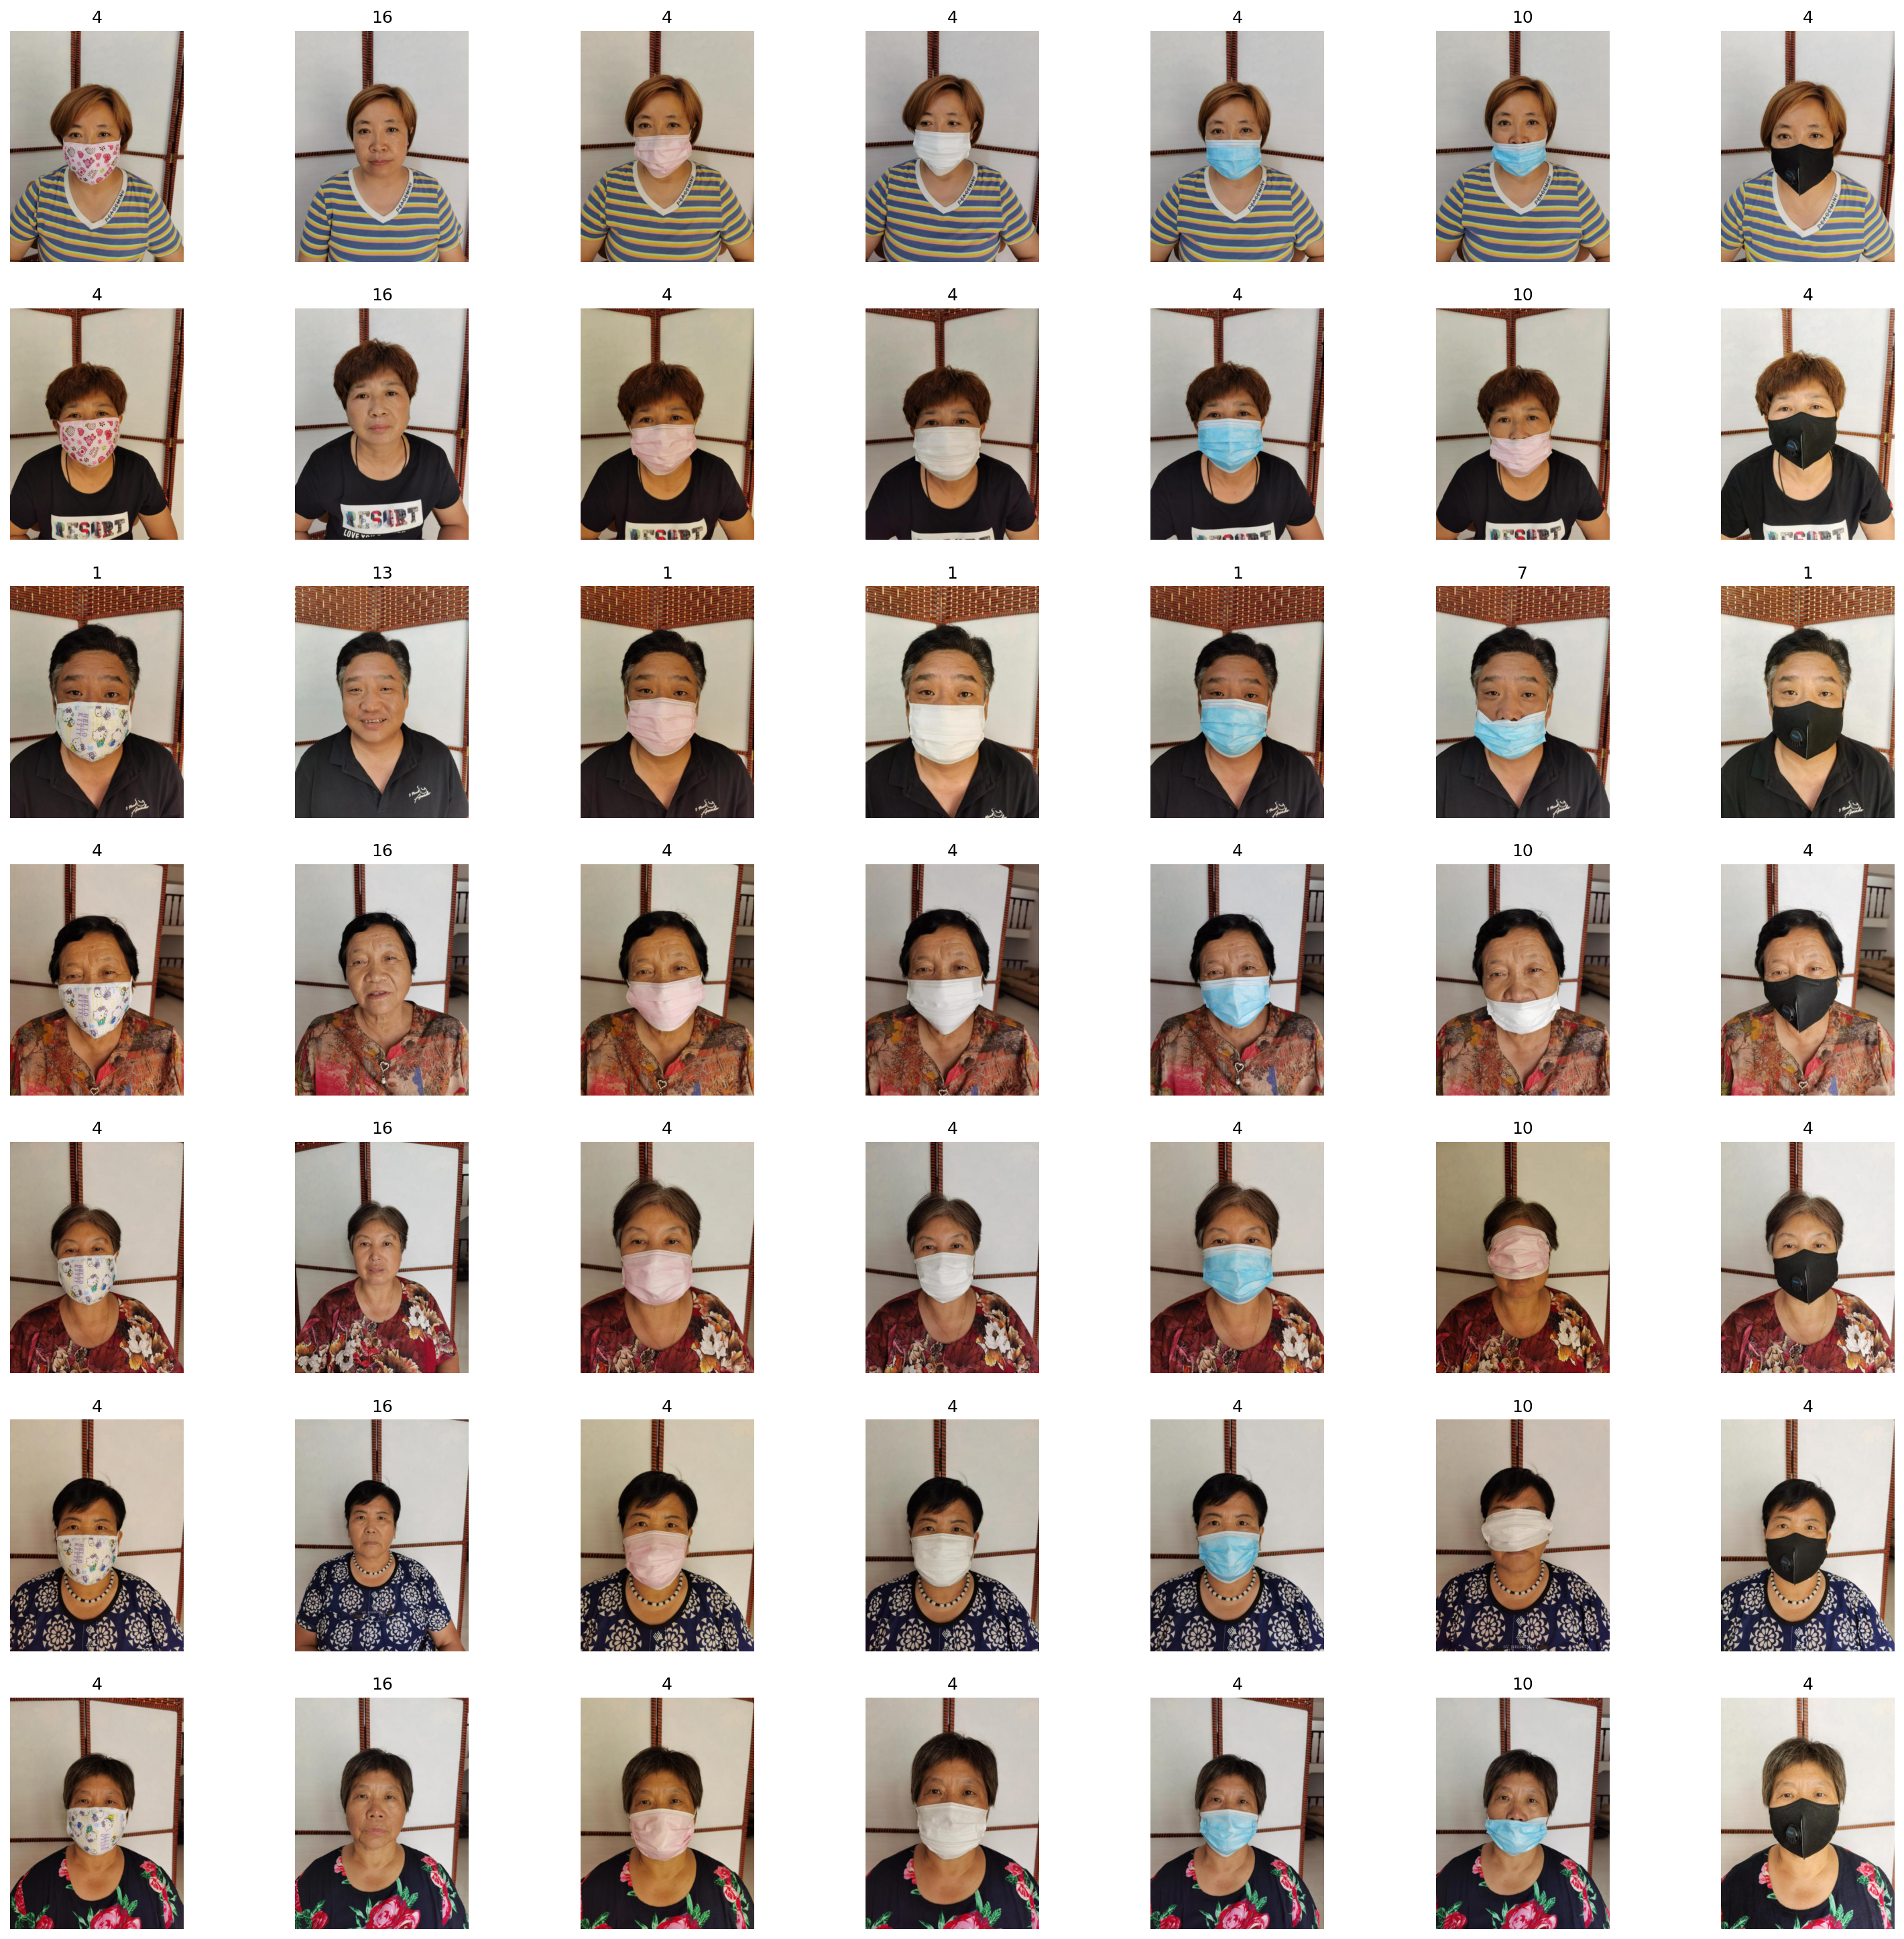

In [37]:
plt.figure(figsize=(25,25),dpi=150)
for idx, t in enumerate(train_data[:49]):
    plt.subplot(7,7,idx+1)
    plt.imshow(train_data[idx][0])
    plt.axis('off')
    plt.title(train_data[idx][1])
plt.show()

In [38]:
# image, label 따로 분리
image_data = []
label_data = []

for idx in range(len(df2)):
    absolute_image_path = df2.loc[idx]['absolute_path']
    label = df2.loc[idx]['label']
    image_pil = Image.open(absolute_image_path)
    image_data.append(np.array(image_pil))
    label_data.append(label)

df3 = pd.DataFrame({'image':image_data,'label':label_data})
df3

image  label
0      [[[195, 193, 181], [195, 193, 181], [195, 193,...      4
1      [[[199, 198, 194], [199, 198, 194], [199, 198,...     16
2      [[[193, 184, 169], [193, 184, 169], [193, 184,...      4
3      [[[188, 184, 181], [188, 184, 181], [188, 184,...      4
4      [[[192, 191, 189], [192, 191, 189], [192, 191,...      4
...                                                  ...    ...
18895  [[[197, 198, 192], [197, 198, 192], [197, 198,...      0
18896  [[[197, 196, 191], [197, 196, 191], [197, 196,...      0
18897  [[[197, 196, 191], [198, 197, 192], [198, 197,...      0
18898  [[[220, 219, 214], [220, 219, 214], [220, 219,...      6
18899  [[[192, 191, 186], [192, 191, 186], [192, 191,...      0

[18900 rows x 2 columns]

In [39]:
df3.to_csv("/opt/ml/code/data/train_data.csv", mode='w')

In [40]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torchvision
import math
# Ignore warnings
import warnings
from tqdm.notebook import tqdm

warnings.filterwarnings("ignore")



In [41]:
class MyCustomDataset(Dataset):
    def __init__(self,data ):
        
        self.X = torch.tensor(data['image'])
        self.y = np.array(data['label'],dtype=int8)
        
        self.transformations = \
            transforms.Compose([transforms.ToTensor(),
                                transforms.CenterCrop(200)])
        
    def __getitem__(self, index):
        img = self.X.iloc[index]
        label = self.y.iloc[index]
        # Or you can call the composed version
        img = self.transformations(img)  # (3)
        
        # Note that you only need one of the implementations, (2) or (3)
        return (img, label)

    def __len__(self):
        return len(self.y) # of how many data(images?) you have
        

In [ ]:
my_train_dataset = MyCustomDataset(df3[:15000])
my_test_dataset = MyCustomDataset(df3[15000:])

In [ ]:
my_train_dataset.X[0]

In [ ]:
mask_train_dataloader = DataLoader(my_train_dataset, batch_size = 64, shuffle= True, num_workers=4,drop_last = True) 
mask_test_dataloader = DataLoader(my_test_dataset, batch_size=64, shuffle=False, num_workers=4,drop_last = True)

In [ ]:
next(iter(mask_train_dataloader))

In [ ]:
# magic command %memit 를 사용하기 위해 필요한 라이브러리, 
import memory_profiler 
%load_ext memory_profiler
########################
# ipython_memory를 사용하여 cell별로 메모리를 계속 관찰하기 위한 라이브러리. 
import ipython_memory_usage 
import ipython_memory_usage.ipython_memory_usage as imu
%ipython_memory_usage_start


N =10**6

# memory watching start 
imu.start_watching_memory()

In [ ]:
mask_resnet18 = torchvision.models.resnet18(pretrained=False)
print("네트워크 필요 입력 채널 개수", mnist_resnet18.conv1.weight.shape[1])
print("네트워크 출력 채널 개수 (예측 class type 개수)", mnist_resnet18.fc.weight.shape[0])
print("네트워크 구조", mask_resnet18)

In [ ]:
MNIST_CLASS_NUM = 18
mask_resnet18.fc = torch.nn.Linear(in_features=512, out_features=MNIST_CLASS_NUM, bias=True)
torch.nn.init.xavier_uniform_(mask_resnet18.fc.weight)
stdv = 1. / math.sqrt(mask_resnet18.fc.weight.size(1))
mask_resnet18.fc.bias.data.uniform_(-stdv, stdv)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # 학습 때 GPU 사용여부 결정. Colab에서는 "런타임"->"런타임 유형 변경"에서 "GPU"를 선택할 수 있음

print(f"{device} is using!")

In [ ]:
mask_resnet18.to(device) # Resnent 18 네트워크의 Tensor들을 GPU에 올릴지 Memory에 올릴지 결정함

LEARNING_RATE = 0.0001 # 학습 때 사용하는 optimizer의 학습률 옵션 설정
NUM_EPOCH = 5 # 학습 때 mnist train 데이터 셋을 얼마나 많이 학습할지 결정하는 옵션

loss_fn = torch.nn.CrossEntropyLoss() # 분류 학습 때 많이 사용되는 Cross entropy loss를 objective function으로 사용 - https://en.wikipedia.org/wiki/Cross_entropy
optimizer = torch.optim.Adam(mask_resnet18.parameters(), lr=LEARNING_RATE) # weight 업데이트를 위한 optimizer를 Adam으로 사용함

dataloaders = {
    "train" : mask_train_dataloader,
    "test" : mask_test_dataloader
}

In [ ]:
### 학습 코드 시작
best_test_accuracy = 0.
best_test_loss = 9999.

for epoch in range(NUM_EPOCH):
      for phase in ["train", "test"]:
        running_loss = 0.
        running_acc = 0.
        if phase == "train":
            mask_resnet18.train() # 네트워크 모델을 train 모드로 두어 gradient을 계산하고, 여러 sub module (배치 정규화, 드롭아웃 등)이 train mode로 작동할 수 있도록 함
        elif phase == "test":
            mask_resnet18.eval() # 네트워크 모델을 eval 모드 두어 여러 sub module들이 eval mode로 작동할 수 있게 함

        for ind, (images, labels) in enumerate(tqdm(dataloaders[phase])):
            # (참고.해보기) 현재 tqdm으로 출력되는 것이 단순히 진행 상황 뿐인데 현재 epoch, running_loss와 running_acc을 출력하려면 어떻게 할 수 있는지 tqdm 문서를 보고 해봅시다!
            # hint - with, pbar
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad() # parameter gradient를 업데이트 전 초기화함

            with torch.set_grad_enabled(phase == "train"): # train 모드일 시에는 gradient를 계산하고, 아닐 때는 gradient를 계산하지 않아 연산량 최소화
                logits = mask_resnet18(images)
                _, preds = torch.max(logits, 1) # 모델에서 linear 값으로 나오는 예측 값 ([0.9,1.2, 3.2,0.1,-0.1,...])을 최대 output index를 찾아 예측 레이블([2])로 변경함  
                loss = loss_fn(logits, labels)

            if phase == "train":
                loss.backward() # 모델의 예측 값과 실제 값의 CrossEntropy 차이를 통해 gradient 계산
                optimizer.step() # 계산된 gradient를 가지고 모델 업데이트

            running_loss += loss.item() * images.size(0) # 한 Batch에서의 loss 값 저장
            running_acc += torch.sum(preds == labels.data) # 한 Batch에서의 Accuracy 값 저장

        # 한 epoch이 모두 종료되었을 때,
        epoch_loss = running_loss / len(dataloaders[phase].dataset)
        epoch_acc = running_acc / len(dataloaders[phase].dataset)

        print(f"현재 epoch-{epoch}의 {phase}-데이터 셋에서 평균 Loss : {epoch_loss:.3f}, 평균 Accuracy : {epoch_acc:.3f}")
        if phase == "test" and best_test_accuracy < epoch_acc: # phase가 test일 때, best accuracy 계산
            best_test_accuracy = epoch_acc
        if phase == "test" and best_test_loss > epoch_loss: # phase가 test일 때, best loss 계산
            best_test_loss = epoch_loss
print("학습 종료!")
print(f"최고 accuracy : {best_test_accuracy}, 최고 낮은 loss : {best_test_loss}")

In [ ]:
best_test_accuracy